In [63]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import nltk
from nltk.tokenize import word_tokenize

import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

### I have going to cover following step
1. Clean Then text
2. Apply One hot encoding
3. Apply pad sequence
4. Build RNN model
5. compail model
6. Train the RNN model

In [32]:
# load dataset
df = pd.read_csv("../../../dataset/Restaurant reviews.csv")
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [33]:
# chek null value
df.isnull().sum()

Review    45
Rating    38
dtype: int64

In [34]:
df.shape

(10000, 2)

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(9955, 2)

In [37]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [38]:
df['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [39]:
# remove Like
df[df['Rating'] == "Like"].index

Index([7601], dtype='int64')

In [40]:
df.drop(index=df[df['Rating'] == "Like"].index, inplace=True)

In [41]:
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [42]:
# all rating into flot
df['Rating'] = df['Rating'].apply(float)

In [43]:
# Create target variable
# 1 = Positive, 0 = Negative Review
df['Target'] = df['Rating'].apply(lambda x: 1 if x > 3.0 else 0)

In [44]:
df.head()

,Review,Rating,Target
0,"The ambience was good, food was quite good . h...",5.0,1
1,Ambience is too good for a pleasant evening. S...,5.0,1
2,A must try.. great food great ambience. Thnx f...,5.0,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,1


In [45]:
df.drop(columns=['Rating'], inplace=True)

In [46]:
df.head()

,Review,Target
0,"The ambience was good, food was quite good . h...",1
1,Ambience is too good for a pleasant evening. S...,1
2,A must try.. great food great ambience. Thnx f...,1
3,Soumen das and Arun was a great guy. Only beca...,1
4,Food is good.we ordered Kodi drumsticks and ba...,1


In [ ]:


# Clean the text
corpus = []
for i in range(0, len(df)):
    reviews = re.sub('[^a-zA-Z]', ' ', df['Review'].iloc[i])
    reviews = reviews.lower()
    reviews = word_tokenize(reviews, language="english")
    reviews = " ".join(reviews)
    corpus.append(reviews)


In [48]:
# define vocabulary size
voc_size = 10000
one_hot_repre = [one_hot(word, voc_size) for word in corpus]
one_hot_repre

[[6663,
  2199,
  6002,
  6949,
  1082,
  6002,
  7196,
  6949,
  3505,
  4036,
  6252,
  6007,
  6002,
  1598,
  8243,
  6949,
  9743,
  7830,
  8727,
  4353,
  3724,
  7546,
  7066,
  4231,
  7918,
  913,
  7983,
  9267,
  3633,
  7567,
  7725,
  5044,
  4513,
  6002,
  878,
  6877,
  9267,
  9377],
 [2199,
  6801,
  4431,
  6949,
  7830,
  8727,
  8443,
  2771,
  6859,
  6801,
  5262,
  5058,
  1082,
  6801,
  6949,
  992,
  5119,
  8727,
  6949,
  7518,
  5044,
  4513,
  8131,
  2590,
  6663,
  6859],
 [8727,
  9713,
  8980,
  5280,
  1082,
  5280,
  2199,
  1808,
  7830,
  6663,
  6859,
  3026,
  5422,
  9267,
  3020,
  6257,
  1184,
  2105,
  6801,
  723,
  2071,
  7419,
  4231,
  6663,
  8271,
  4355,
  6663,
  5099,
  6801,
  9055],
 [5044,
  4513,
  9267,
  2828,
  6002,
  8727,
  5280,
  8160,
  2099,
  84,
  2722,
  6172,
  8744,
  9267,
  8001,
  9267,
  6949,
  1082,
  4351,
  8900,
  2111,
  7274,
  8852,
  2590,
  4190,
  1105,
  9743,
  1927],
 [1082,
  6801,
  6949,
  

In [56]:
# Create X and y
X = one_hot_repre
y = df['Target']

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
len(X_train)

7963

In [61]:
# apply pad sequence
max_length=500
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
X_train

array([[   0,    0,    0, ..., 6801, 6663, 8615],
       [   0,    0,    0, ..., 7983, 9267, 9261],
       [   0,    0,    0, ..., 8727, 6449, 7309],
       ...,
       [   0,    0,    0, ..., 1082, 2199, 6859],
       [   0,    0,    0, ..., 6663, 7424, 7461],
       [   0,    0,    0, ..., 1852, 1703, 5212]])

In [62]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [64]:
# Build RNN model
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=128, input_length=max_length))
model.add(SimpleRNN(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [67]:
# Setup EarlyStopping
earlystoping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [68]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=[X_test, y_test],
    callbacks=[earlystoping]
)

Epoch 1/10


125/125 [==============================] - 17s 112ms/step - loss: 0.5338 - accuracy: 0.7136 - val_loss: 0.3818 - val_accuracy: 0.8378
Epoch 2/10
125/125 [==============================] - 14s 110ms/step - loss: 0.2723 - accuracy: 0.8953 - val_loss: 0.3175 - val_accuracy: 0.8769
Epoch 3/10
125/125 [==============================] - 14s 112ms/step - loss: 0.2405 - accuracy: 0.9107 - val_loss: 0.3512 - val_accuracy: 0.8709
Epoch 4/10
125/125 [==============================] - 14s 112ms/step - loss: 0.1668 - accuracy: 0.9382 - val_loss: 0.3556 - val_accuracy: 0.8579
Epoch 5/10
125/125 [==============================] - 14s 114ms/step - loss: 0.1196 - accuracy: 0.9528 - val_loss: 0.3836 - val_accuracy: 0.8659
Epoch 6/10
125/125 [==============================] - 14s 114ms/step - loss: 0.0927 - accuracy: 0.9660 - val_loss: 0.4174 - val_accuracy: 0.8513
Epoch 7/10
125/125 [==============================] - 14s 114ms/step - loss: 0.1261 - accuracy: 0.9542 - val_loss: 0.4961 - val_

In [74]:
# save model
model.save("simple_rnn.h5")

d:\machine-learning\deep-learning-project\Restaurant-Reviews-RNN-Problem\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
test_loss, test_acc = model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 20ms/step - loss: 0.4105 - accuracy: 0.8513


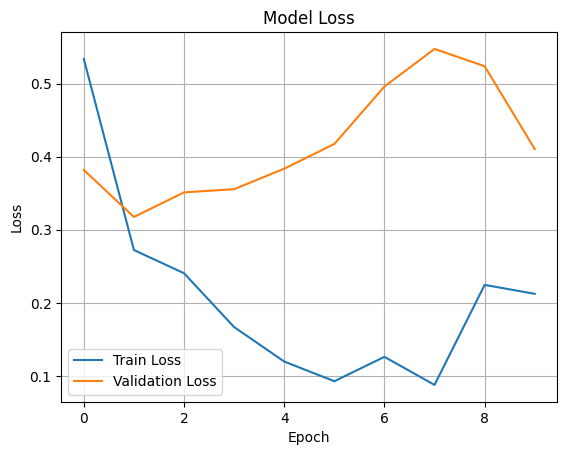

In [73]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

## Prediction for new data

In [78]:
# load model
from tensorflow.keras.models import load_model

model = load_model('simple_rnn.h5')

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.04005688, -0.03784377,  0.00614607, ..., -0.03008673,
         -0.01030227, -0.02486211],
        [-0.09897067,  0.05355093,  0.03110246, ...,  0.12200399,
          0.11210763, -0.09956556],
        [-0.04543601,  0.03024626,  0.03370157, ..., -0.04964056,
          0.02487493, -0.00916155],
        ...,
        [ 0.02238383, -0.06545092,  0.02303667, ...,  0.03071588,
         -0.05457491,  0.01446515],
        [-0.0107725 ,  0.02156191,  0.03440575, ...,  0.01573543,
          0.01630187,  0.04437478],
        [ 0.01765785, -0.03100595,  0.04676366, ..., -0.03206742,
          0.03191059, -0.04207715]], dtype=float32),
 array([[-0.09619282, -0.01556977,  0.04601688, ...,  0.08055256,
         -0.09337303,  0.17617156],
        [-0.0074662 ,  0.06227415,  0.06118024, ..., -0.19229713,
          0.0605664 ,  0.07876564],
        [-0.11952519,  0.05746726, -0.13796842, ..., -0.01871022,
         -0.0613776 , -0.04068087],
        ...,
        [-0.03185977,  0.01211576,  0.0

In [ ]:
corpus = []
for i in range(0, len(df)):
    reviews = re.sub('[^a-zA-Z]', ' ', df['Review'].iloc[i])
    reviews = reviews.lower()
    reviews = word_tokenize(reviews, language="english")
    reviews = " ".join(reviews)
    corpus.append(reviews)

In [104]:

# Function to preprocess user input
def preprocess_text(text):
    reviews = re.sub('[^a-zA-Z]', ' ', text)
    reviews = reviews.lower() 
    encoded_review = one_hot(reviews, voc_size)
    padded_review = pad_sequences([encoded_review], maxlen=max_length)
    return padded_review


In [108]:
def predict_sentiment(review):
    processes_input = preprocess_text(review)
    prediction = model.predict(processes_input)
    
    sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
    
    return sentiment, prediction[0][0]

    


In [128]:
example_review = "The food was not amazing"

sentiment, score = predict_sentiment(example_review)

print("Review Text: ", example_review)
print("Sentiment: ", sentiment)
print("Score: ", score)

1/1 [==============================] - 0s 32ms/step
Review Text:  The food was not amazing
Sentiment:  Negative
Score:  0.10057912
